In [ ]:
!pip install naima

In [1]:
import astropy.units as u
from astropy.constants import c, h
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from naima.models import PowerLaw

In [4]:
# HESS spectrum (averaged)
EHess = np.logspace(np.log10(0.2), np.log10(1), 20) * u.TeV
FHess = PowerLaw(
    3.61e-12 / u.cm**2 / u.TeV / u.s,
    0.4 * u.TeV,
    3.4
)

# Fermi-LAT (100 MeV - 500 GeV)
EFermi = np.logspace(np.log10(0.1), np.log10(500), 20) * u.GeV
IntFermi = 8.15e-9 / u.cm**2 / u.s
index = 1.69
E0 = 1*u.GeV
FFermi = PowerLaw(
    ( IntFermi * (index - 1) * (EFermi.min() * EFermi.max())**index /
    (E0**index * EFermi.min() * EFermi.max()**index - E0**index * EFermi.max() * EFermi.min()**index) ),
    E0,
    index
)

# RXTE PCA (3 - 7 keV)
ERxte = np.logspace(np.log10(3), np.log10(7), 20) * u.keV
FRxte = PowerLaw(
    7.26e-3 / u.cm**2 / u.keV / u.s,
    1 * u.keV,
    2.8
)

# Swift-XRT (0.4 - 6 keV)
EXRT = np.logspace(np.log10(0.4), np.log10(6), 20) * u.keV
# Obs 4 (highest flux)
FXRT = PowerLaw(
    2.59e-3 / u.cm**2 / u.keV / u.s,
    1 * u.keV,
    2.14
)

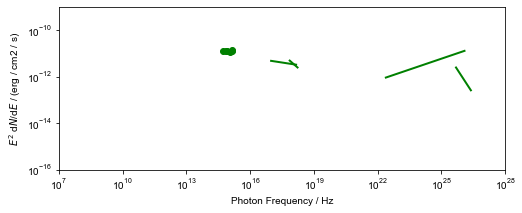

In [5]:
plt.figure(figsize=(8,3))

# Spectra
plt.plot((EHess/h).to(u.Hz), (EHess**2 * FHess(EHess)).to(u.erg / u.cm**2 / u.s), 'g-')
plt.plot((EFermi/h).to(u.Hz), (EFermi**2 * FFermi(EFermi)).to(u.erg / u.cm**2 / u.s), 'g-')
plt.plot((ERxte/h).to(u.Hz), (ERxte**2 * FRxte(ERxte)).to(u.erg / u.cm**2 / u.s), 'g-')
plt.plot((EXRT/h).to(u.Hz), (EXRT**2 * FXRT(EXRT)).to(u.erg / u.cm**2 / u.s), 'g-')

# Obs 4 (Swift-UVOT)
plt.plot((c/(5402*u.Angstrom)).to(u.Hz), ((c / (5402*u.Angstrom)) * 2.15*u.mJy).to(u.erg / u.cm**2 / u.s), 'go')
plt.plot((c/(4329*u.Angstrom)).to(u.Hz), ((c / (4329*u.Angstrom)) * 1.75*u.mJy).to(u.erg / u.cm**2 / u.s), 'go')
plt.plot((c/(3501*u.Angstrom)).to(u.Hz), ((c / (3501*u.Angstrom)) * 1.52*u.mJy).to(u.erg / u.cm**2 / u.s), 'go')
plt.plot((c/(2634*u.Angstrom)).to(u.Hz), ((c / (2634*u.Angstrom)) * 1.04*u.mJy).to(u.erg / u.cm**2 / u.s), 'go')
plt.plot((c/(2231*u.Angstrom)).to(u.Hz), ((c / (2231*u.Angstrom)) * 1.00*u.mJy).to(u.erg / u.cm**2 / u.s), 'go')
plt.plot((c/(2030*u.Angstrom)).to(u.Hz), ((c / (2030*u.Angstrom)) * 0.87*u.mJy).to(u.erg / u.cm**2 / u.s), 'go')


plt.xscale('log')
plt.yscale('log')

plt.xlabel(f'Photon Frequency / Hz')
plt.ylabel(f'$E^2$ d$N$/d$E$ / (erg / cm2 / s)')

plt.xlim(1e7, 1e28)
plt.ylim(1e-16, 1e-9);

In [6]:
from naima.models import BrokenPowerLaw

In [7]:
BPL = BrokenPowerLaw(
    1e35 / u.eV, # amplitude
    1 * u.TeV, # reference energy E0
    10 * u.TeV, # break energy
    2.7, # alpha 1
    3.7 # alpha 2
)

In [8]:
from naima.models import EblAbsorptionModel

In [9]:
redshift = 0.417
EBL = EblAbsorptionModel(redshift)

In [10]:
from naima.models import Synchrotron, InverseCompton

In [11]:
# Define energy range of photons / gamma rays
Egs = np.logspace(-6, 14, 1000) * u.eV

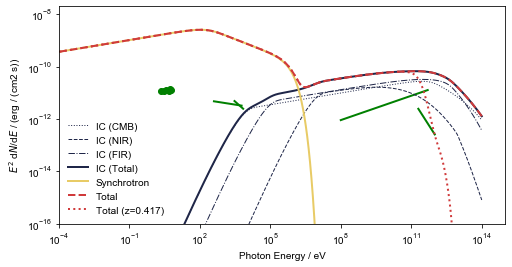

In [12]:
plt.figure(figsize=(8,4))

# Observations
plt.plot((EHess).to(Egs.unit), (EHess**2 * FHess(EHess)).to(u.erg / u.cm**2 / u.s), 'g-')
plt.plot((EFermi).to(Egs.unit), (EFermi**2 * FFermi(EFermi)).to(u.erg / u.cm**2 / u.s), 'g-')
plt.plot((ERxte).to(Egs.unit), (ERxte**2 * FRxte(ERxte)).to(u.erg / u.cm**2 / u.s), 'g-')
plt.plot((EXRT).to(Egs.unit), (EXRT**2 * FXRT(EXRT)).to(u.erg / u.cm**2 / u.s), 'g-')
plt.plot((c*h/(5402*u.Angstrom)).to(Egs.unit), ((c / (5402*u.Angstrom)) * 2.15*u.mJy).to(u.erg / u.cm**2 / u.s), 'go')
plt.plot((c*h/(4329*u.Angstrom)).to(Egs.unit), ((c / (4329*u.Angstrom)) * 1.75*u.mJy).to(u.erg / u.cm**2 / u.s), 'go')
plt.plot((c*h/(3501*u.Angstrom)).to(Egs.unit), ((c / (3501*u.Angstrom)) * 1.52*u.mJy).to(u.erg / u.cm**2 / u.s), 'go')
plt.plot((c*h/(2634*u.Angstrom)).to(Egs.unit), ((c / (2634*u.Angstrom)) * 1.04*u.mJy).to(u.erg / u.cm**2 / u.s), 'go')
plt.plot((c*h/(2231*u.Angstrom)).to(Egs.unit), ((c / (2231*u.Angstrom)) * 1.00*u.mJy).to(u.erg / u.cm**2 / u.s), 'go')
plt.plot((c*h/(2030*u.Angstrom)).to(Egs.unit), ((c / (2030*u.Angstrom)) * 0.87*u.mJy).to(u.erg / u.cm**2 / u.s), 'go')


IC = InverseCompton(BPL, 
                    index = 2.8,
                    seed_photon_fields=[
                        ['CMB', 2.72548*u.K, 4.17467838e-13*u.erg/u.cm**3],
                        ['NIR', 3000*u.K, 1*u.eV/u.cm**3],
                        ['FIR', 30*u.K, 0.5*u.eV/u.cm**3],
                    ],
                   )
plt.plot(Egs, IC.sed(Egs, seed='CMB'), label='IC (CMB)', color='#1F2648', lw=1, ls='dotted')
plt.plot(Egs, IC.sed(Egs, seed='NIR'), label='IC (NIR)', color='#1F2648', lw=1, ls='dashed')
plt.plot(Egs, IC.sed(Egs, seed='FIR'), label='IC (FIR)', color='#1F2648', lw=1, ls='dashdot')
plt.plot(Egs, IC.sed(Egs), label='IC (Total)')


SYN = Synchrotron(BPL, B=30*u.uG)
plt.plot(Egs, SYN.sed(Egs), label='Synchrotron', color='#E8CB66')

plt.plot(Egs, SYN.sed(Egs) + IC.sed(Egs), label='Total', ls='dashed', color='#D03A3B')

plt.plot(Egs, (SYN.sed(Egs) + IC.sed(Egs)) * EBL.transmission(Egs), label=f'Total (z={redshift})', ls='dotted', color='#D03A3B')

plt.legend()

plt.xscale('log')
plt.yscale('log')

plt.xlabel(f'Photon Energy / {Egs.unit}')
plt.ylabel(f'$E^2$ d$N$/d$E$ / ({IC.sed(Egs).unit})')

plt.xlim(1e-4, 1e15)
plt.ylim(1e-16, 2e-8);